In [14]:

import pandas as pd   # Load the Dataset

In [3]:
df = pd.read_csv(r"C:\Users\Shehan\Downloads\sample_sales_data.csv")
print(df.head())      

         Date  Store  Weekly_Sales  Holiday_Flag
0  2023-01-01      3         20045             0
1  2023-01-08      1         18172             0
2  2023-01-15      3         23245             1
3  2023-01-22      3         13885             0
4  2023-01-29      1         22681             0


In [15]:
print(df.info())   # Understand the data structure
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          100 non-null    datetime64[ns]
 1   Store         100 non-null    int64         
 2   Weekly_Sales  100 non-null    int64         
 3   Holiday_Flag  100 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.3 KB
None
                      Date       Store  Weekly_Sales  Holiday_Flag
count                  100  100.000000    100.000000    100.000000
mean   2023-12-13 12:00:00    1.980000  20828.240000      0.190000
min    2023-01-01 00:00:00    1.000000  11057.000000      0.000000
25%    2023-06-23 06:00:00    1.000000  17661.500000      0.000000
50%    2023-12-13 12:00:00    2.000000  20777.000000      0.000000
75%    2024-06-03 18:00:00    3.000000  24359.750000      0.000000
max    2024-11-24 00:00:00    3.000000  33672.000000      1.000000

In [11]:
# Convert Dates and Sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

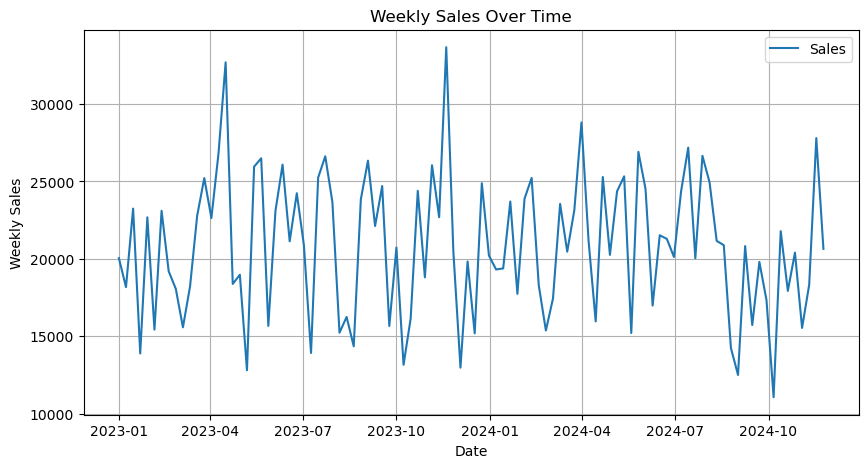

In [18]:
# Visualize Sales Over Time
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Weekly_Sales'], label='Sales')
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.legend()
plt.show()           

In [20]:
# Create New Features
df['day_of_week'] = df['Date'].dt.dayofweek
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [25]:

from sklearn.model_selection import train_test_split  # Prepare for Machine Learning
from sklearn.linear_model import LinearRegression

x = df[['day_of_week','month','year','Holiday_Flag']]
y = df['Weekly_Sales']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [29]:
# Import the LinearRegression class from sklearn
from sklearn.linear_model import LinearRegression

model = LinearRegression()   # Train a simple model
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 2951.62
RMSE: 3840.06


C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
sample = pd.DataFrame([[4, 6, 2025, 0]], columns=['day_of_week', 'month', 'year', 'Holiday_Flag'])
prediction = model.predict(sample)
print("Predicted Sales:", prediction[0])


Predicted Sales: 21207.776027514818


In [ ]:
##  I Can Report
 ##"I trained a model that predicts weekly sales using calendar data. 
 ##It has an error of ~X dollars. It can help the company plan inventory 
##Sbetter for different months and holidays."